In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import csv

In [3]:
from water_pollution.data.preproc import Station
from water_pollution.data.preproc import get_rawdf_from_file
from water_pollution.data.preproc import cook_rawdf
from water_pollution.data.preproc import split_rawdf_to_stations
from water_pollution.data.preproc import turn_df_to_month

from water_pollution.data import visu

In [4]:
file_path = '../../raw_data/pc_saone_2011_2021/Analyses.CSV'

In [5]:
# builds raw dataframe from file
raw_df = get_rawdf_from_file(file_path)

# Splits raw_df to stations
stations = split_rawdf_to_stations(raw_df)


In [6]:
st = stations[6000990]

In [7]:
st.df

,CdStationMesureEauxSurface,LbStationMesureEauxSurface,DatePrel,CdParametre,LbLongParamètre,RsAna,CdQualAna
164,6000990,SAONE A BELRUPT,2013-01-28,1301,Température de l'Eau,4.03,1
165,6000990,SAONE A BELRUPT,2013-01-28,1302,Potentiel en Hydrogène (pH),7.71,1
166,6000990,SAONE A BELRUPT,2013-01-28,1303,Conductivité à 25°C,61.00,1
170,6000990,SAONE A BELRUPT,2013-01-28,1311,Oxygène dissous,12.27,1
177,6000990,SAONE A BELRUPT,2013-01-28,1350,Phosphore total,0.04,1
...,...,...,...,...,...,...,...
39327,6000990,SAONE A BELRUPT,2021-04-09,1433,Orthophosphates (PO4),0.06,1
39336,6000990,SAONE A BELRUPT,2021-05-07,1340,Nitrates,2.50,1
39347,6000990,SAONE A BELRUPT,2021-05-07,1433,Orthophosphates (PO4),0.07,1
39359,6000990,SAONE A BELRUPT,2021-07-07,1340,Nitrates,3.20,1


In [14]:
for st_id,st in stations.items() :
    st.cooked_df = cook_rawdf(st.df)
    st.month_df = turn_df_to_month(st.cooked_df)

In [10]:
# # Pickle save
# save_path = '../../cooked_data/2011_2021_pc_saone_df.pickle'
# saone_df.to_pickle(save_path)
# # Restore Pickle
# restored_df = pd.read_pickle(save_path)

In [11]:
stations.keys()

dict_keys([6000990, 6000993, 6000998, 6001000, 6002500, 6003600, 6005500, 6011000, 6017050, 6017070, 6037400, 6038700, 6039500, 6045800, 6053800, 6059500, 6810010])

In [47]:
st = stations[6005500]

In [41]:
save_folder = '../../cooked_data/station_data_2011_2021/'
file_name = str(st.id) + '.pickle'
save_path = save_folder + file_name
save_path

st.month_df.to_pickle(save_path)

6005500  /  SAONE A APREMONT 1


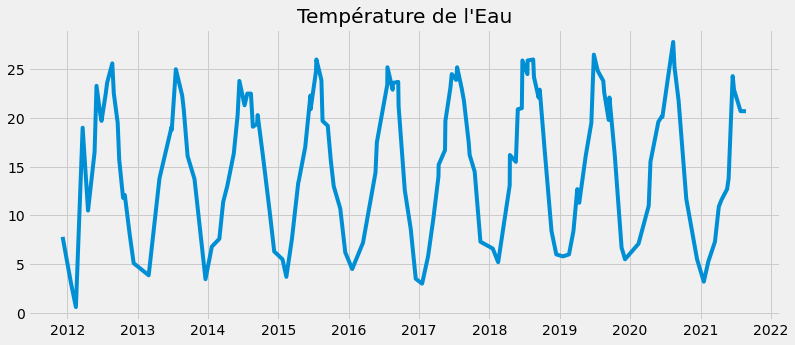

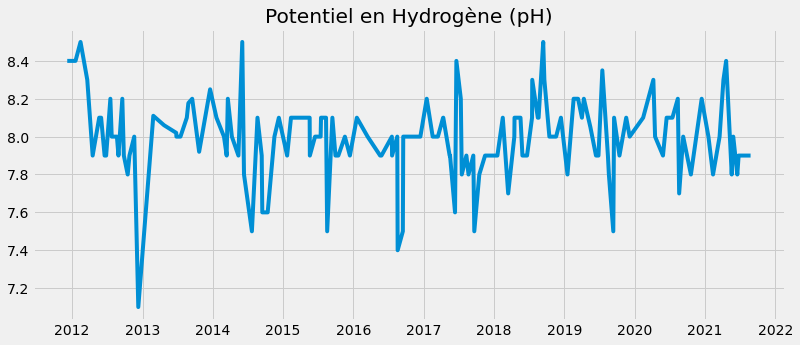

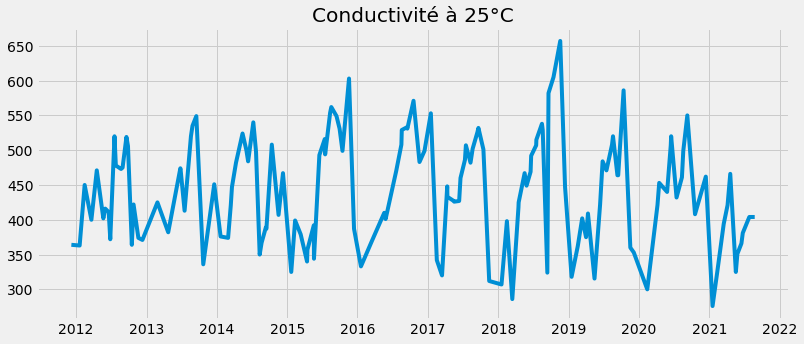

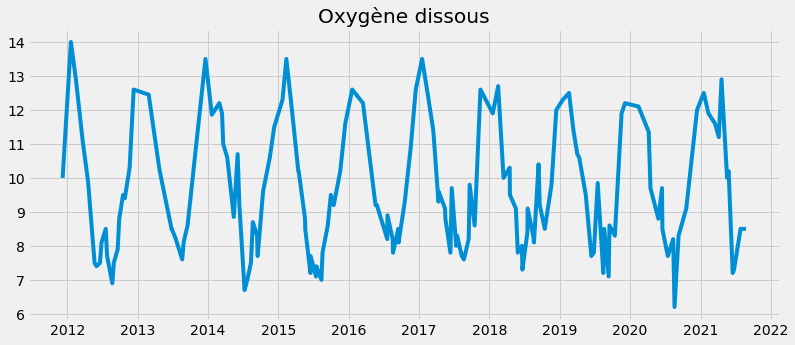

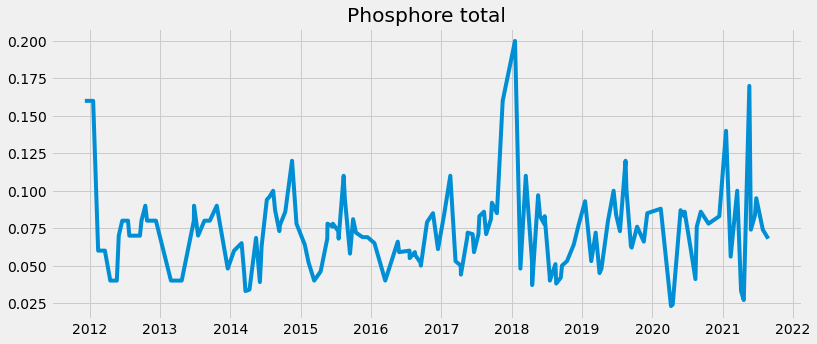

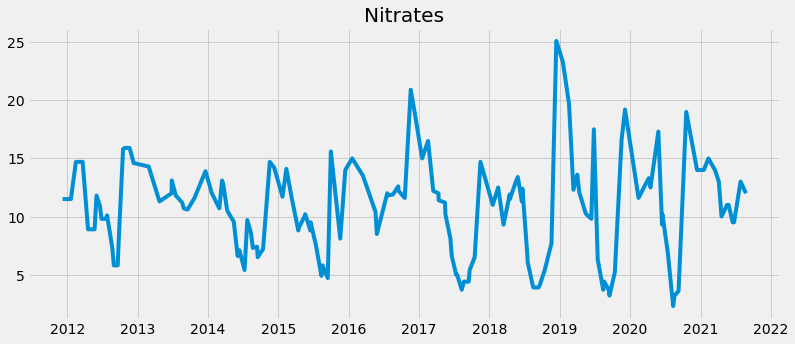

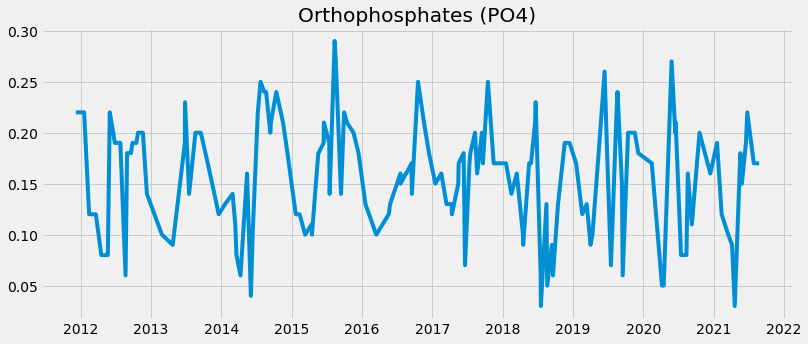

ValueError: invalid literal for int() with base 10: 'month'

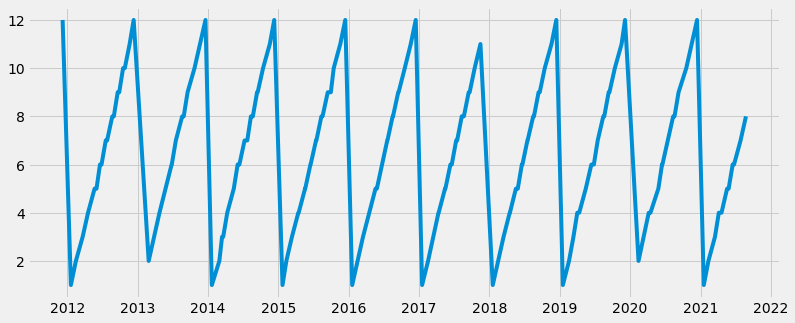

In [48]:
# Visu d'une station
print(st.id,' / ',st.label)
visu.plot_params(st.cooked_df)

6000990  /  SAONE A BELRUPT 


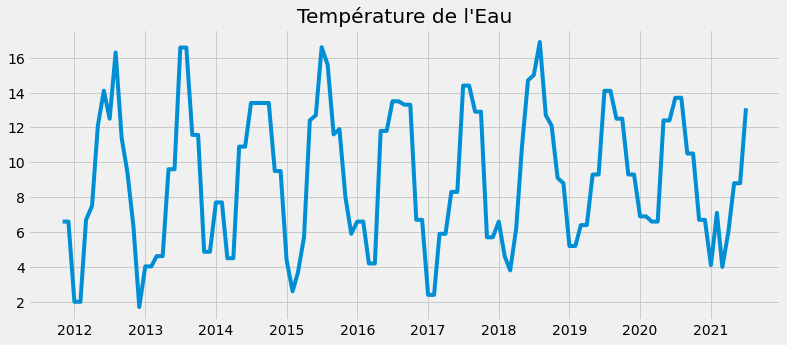

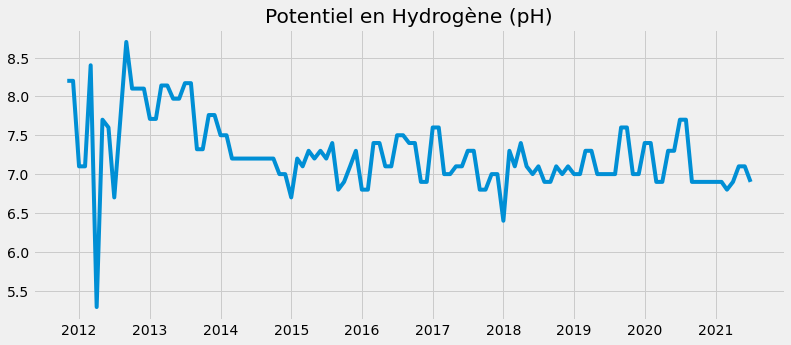

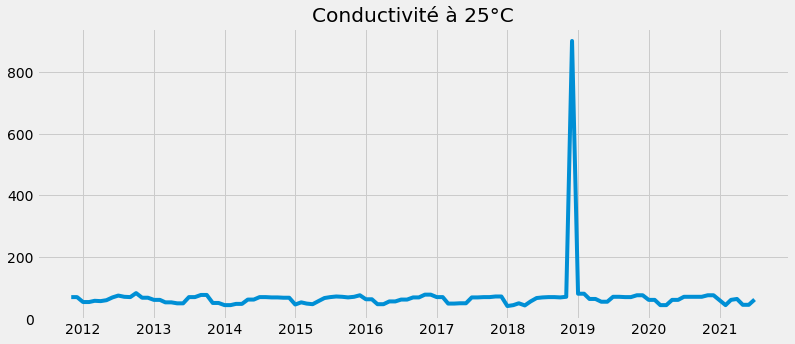

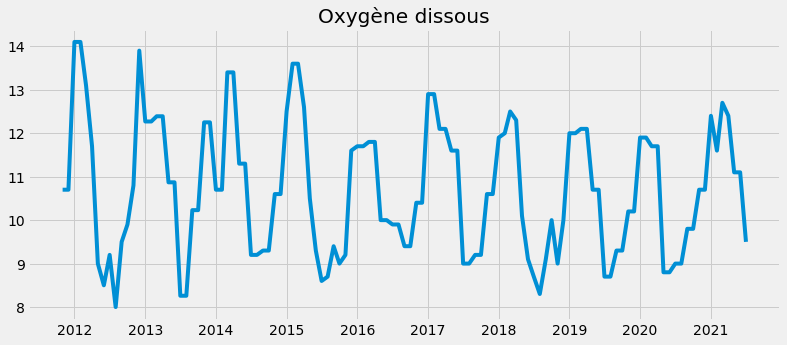

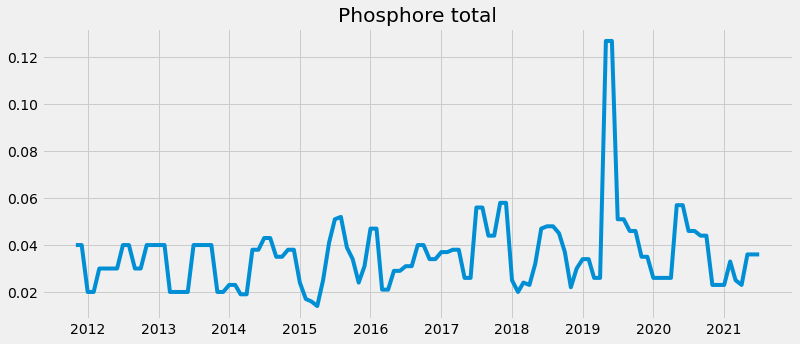

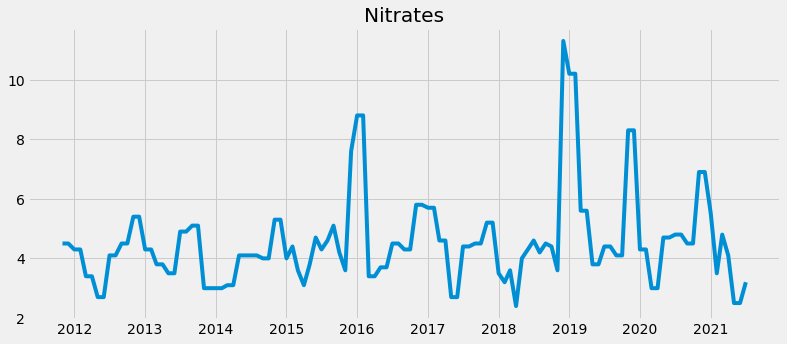

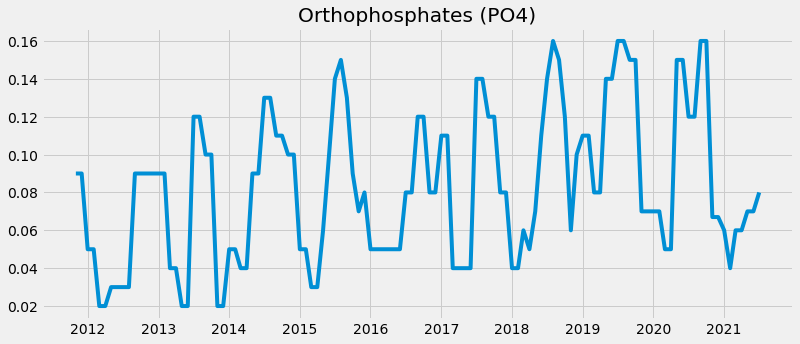

In [18]:
# Visualisation station par station...

print(st.id,' / ',st.label)
visu.plot_params(st.month_df)

In [51]:
STATIONS = [
    {
        'id':6059500,
        'label': 'SAONE A LYON 1',
        'coord':  [ 4.831905651439411, 45.796538771031791 ]
    },
    {
        'id':6000990,
        'label': 'SAONE A BELRUPT',
        'coord': [ 6.101940890815991, 48.090273327987276 ]
    },
    {
        'id':6001000,
        'label': 'SAONE A CENDRECOURT',
        'coord':  [ 5.917378095285407, 47.840260837412551 ]
    },
    {
        'id':6002500,
        'label': 'SAONE A PORT-SUR-SAONE',
        'coord':  [ 6.039291564176292, 47.691078334268859 ]
    },
    {
        'id':6003600,
        'label': 'SAONE A SCEY-SUR-SAONE',
        'coord':  [ 5.972459738821173, 47.661731120409826 ]
    },
    {
        'id':6005500,
        'label': 'SAONE A APREMONT 1',
        'coord':  [ 5.544088676925676, 47.39571566626848 ]
    },

]

In [52]:
STATION_IDS = [ station['id'] for station in STATIONS]

In [53]:
STATION_IDS

[6059500, 6000990, 6001000, 6002500, 6003600, 6005500]